# Fundamentals of Data Science
## Assignment 771766
### Name: IFEANYI ANTHONY OKPALA
### Student Number: 202203449

# Tasks

This illustrates various steps taken to clean and analyse a given census of a moderately sized town to make advice for 

investment in the future and use cases for developments on an unused plot of land. 

In this project we will be focusing on two main task:

* Data Cleaning
* Data Visualization and Analysis

We will first start with the data data cleaning task but it is necessary to ensure all packages required for this project are installed.

We might need to install some packages for analysis such as pandas and sweetviz by using pip install as shown below:

`pip install pandas` and `pip install sweetviz`

## Data Cleaning Task

Data cleaning is important to correct or remove any anomalies in the data.

Fisrtly,let's import all libraries needed for this project.

In [1]:
# Importing all libraries needed for this project.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from IPython.display import IFrame

%matplotlib inline

Now we have imported the libraries to be used for our project, It is important we create a copy of our data to ensure we maintain the original data then we start cleaning our data.

In [2]:
# Let's get our census data.
census_df = pd.read_csv("./census_10_2022.csv",index_col=0) 

# Let's create a copy of the dataframe 'census_c_df' so we can still have the original while we clean.
census_c_df = census_df.copy() 

# Let's print the first five(5) lines of our raw census data.
census_df.head()      

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Christmas Street,Kerry,Jones,34,Head,Married,Female,Mechanical engineer,None,None
1,1,Christmas Street,Allan,Collins,36,Husband,Married,Male,Ranger/warden,None,None
2,2,Christmas Street,Michelle,Davies,74,Head,Widowed,Female,Retired Oncologist,None,Christian
3,2,Christmas Street,Jonathan,Davies,41,Son,Divorced,Male,Ceramics designer,None,Christian
4,2,Christmas Street,Paige,Davies,39,Daughter,Widowed,Female,Unemployed,None,Christian


In [3]:
"""
ISSUES DEETECTED FROM .INFO() ARE:
1. THERE ARE NULL VALUES IN OUR DATA SET IN COLUMN 'Marital Status' AND 'Religion'.
2. COLOUMN 'Age' SHOULD BE OF VALUE TYPE INTEGER.

"""
census_df.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7260 entries, 0 to 7259
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7260 non-null   int64 
 1   Street                         7260 non-null   object
 2   First Name                     7260 non-null   object
 3   Surname                        7260 non-null   object
 4   Age                            7260 non-null   object
 5   Relationship to Head of House  7260 non-null   object
 6   Marital Status                 5628 non-null   object
 7   Gender                         7260 non-null   object
 8   Occupation                     7260 non-null   object
 9   Infirmity                      7260 non-null   object
 10  Religion                       5596 non-null   object
dtypes: int64(1), object(10)
memory usage: 680.6+ KB


In [4]:
# Since age is a categorical data with limited values, the unique method helps us see all unique data at a goal.

census_df['Age'].unique()  

array(['34', '36', '74', '41', '39', '35', '29', '66', '64', '72', '9',
       '38', '7', '6', '5', '75', '15', '67', '0', '59', '14', '32', '37',
       '4', '1', '28', '31', '47', '42', '73', '44', '43', '30', '2',
       '46', '50', '24', '20', '17', '70', '48', '21', '56', '10', '12',
       '33', '63', '79', '81', '19', '18', '49', '22', '86', '83', '55',
       '69', '82', '40', '3', '11', '57', '61', '23', '8', '77', '80',
       '25', '71', '84', '68', '52', '27', '62', '78', '65', '26', '53',
       '60', '54', '58', '76', '88', '91', '51', '45', '16', '105', '13',
       '90', '89', '92', '85', '67.99876364', '70.99876364', '87', '99',
       '100', '101', '71.11459116', '58.33545959', '80.42115361',
       '88.42115361', '107', '102', '94', '93', '104', '97', '95', '96',
       ' ', '54.83603273', '78.62792347', '110', 'four', 'three', 'one'],
      dtype=object)

In [5]:
# I will like to investigate the blanks.

census_df[census_df['Age'] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4866,7,Holmes Points,Mitchell,Smith,,Lodger,Divorced,Male,"Sales professional, IT",None,Methodist


In [6]:
# Cleaning data for the 'Age' column.

divorced_mode = int(census_df[census_df['Marital Status'] == "Divorced"]['Age'].mode())

census_df['Age'].replace({'one': 1, 'three': 3, 'four': 4, ' ': divorced_mode }, inplace = True)

census_df['Age'] = pd.to_numeric(census_df['Age'])

census_df['Age'] = census_df['Age'].apply(np.int64)

census_df['Age'].unique()

array([ 34,  36,  74,  41,  39,  35,  29,  66,  64,  72,   9,  38,   7,
         6,   5,  75,  15,  67,   0,  59,  14,  32,  37,   4,   1,  28,
        31,  47,  42,  73,  44,  43,  30,   2,  46,  50,  24,  20,  17,
        70,  48,  21,  56,  10,  12,  33,  63,  79,  81,  19,  18,  49,
        22,  86,  83,  55,  69,  82,  40,   3,  11,  57,  61,  23,   8,
        77,  80,  25,  71,  84,  68,  52,  27,  62,  78,  65,  26,  53,
        60,  54,  58,  76,  88,  91,  51,  45,  16, 105,  13,  90,  89,
        92,  85,  87,  99, 100, 101, 107, 102,  94,  93, 104,  97,  95,
        96, 110], dtype=int64)

In [7]:
# Let's look into the Marital Status column.

census_df['Marital Status'].value_counts(dropna=False)

Single      2431
Married     2135
NaN         1632
Divorced     672
Widowed      367
S              8
M              7
D              4
W              3
               1
Name: Marital Status, dtype: int64

In [8]:
# Let's Clean the Marital Status column.

if_minor = np.where((census_df['Age'] < 18),'(Minor)',census_df['Marital Status'])

census_df['Marital Status'].replace(
    
    {
        'S' : 'Single', 'M' : 'Married', 'D' : 'Divorced', 'W' : 'Widowed', ' ' : if_minor, np.nan : if_minor
        
    }, inplace = True)

census_df['Marital Status'].value_counts(dropna=False)

Single      2439
Married     2142
(Minor)     1633
Divorced     676
Widowed      370
Name: Marital Status, dtype: int64

In [9]:
# Let's look into the Religion column.

census_df['Religion'].value_counts(dropna=False)

None         2514
Christian    1691
NaN          1664
Catholic      752
Methodist     486
Muslim         84
Sikh           41
Jewish         19
Pagan           3
Sith            2
Quaker          2
Nope            1
                1
Name: Religion, dtype: int64

In [10]:
# From the data on religion, nope, blanks and NaN should be assigned to None.

census_df['Religion'].replace([' ', 'Sith', 'Nope', np.nan], 'None', inplace = True)

census_df['Religion'].replace(['Christian','Catholic','Methodist','Quaker'], ['Christianity (Other Denominations)', 'Christianity (Catholic)', 'Christianity (Methodist)','Christianity (Quaker)'], inplace = True)

census_df['Religion'].replace(['Muslim', 'Sikh', 'Jewish', 'Pagan'],['Islam', 'Sikhism','Judaism', 'Paganism'], inplace = True)


census_df['Religion'].value_counts(dropna=False)

None                                  4182
Christianity (Other Denominations)    1691
Christianity (Catholic)                752
Christianity (Methodist)               486
Islam                                   84
Sikhism                                 41
Judaism                                 19
Paganism                                 3
Christianity (Quaker)                    2
Name: Religion, dtype: int64

In [11]:
# Let's look at the unique values in gender.

census_df['Gender'].unique()

array(['Female', 'Male', 'm', 'male', 'female', 'M', 'f', 'F'],
      dtype=object)

In [12]:
# Let's clean our data for the Gender column.

census_df['Gender'].replace(
    
    census_df['Gender'].unique(), 
    
    ['Female' if i[0].upper()=='F' else 'Male'for i in census_df['Gender'].unique() ],
    
    inplace = True)


census_df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
# Let's look at the unique values in Relationship to Head of House.

census_df['Relationship to Head of House'].unique()

array(['Head', 'Husband', 'Son', 'Daughter', 'Wife', 'Lodger', 'Partner',
       'None', 'Grandson', 'Step-Daughter', 'Granddaughter', 'Step-Son',
       'Nephew', 'Neice', 'Sibling', 'Adopted Daughter', 'Adopted Son',
       'Cousin', 'Visitor', 'Son-in-law', 'Adopted Grandson', ' '],
      dtype=object)

In [14]:
# Let's correct the miss spelt value 'Neice'.

census_df['Relationship to Head of House'].replace('Neice', 'Niece', inplace = True)

census_df['Relationship to Head of House'].unique()

array(['Head', 'Husband', 'Son', 'Daughter', 'Wife', 'Lodger', 'Partner',
       'None', 'Grandson', 'Step-Daughter', 'Granddaughter', 'Step-Son',
       'Nephew', 'Niece', 'Sibling', 'Adopted Daughter', 'Adopted Son',
       'Cousin', 'Visitor', 'Son-in-law', 'Adopted Grandson', ' '],
      dtype=object)

In [15]:
# Now we have filled our data, let's investigate the whole data column by column.

census_df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7260 entries, 0 to 7259
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7260 non-null   int64 
 1   Street                         7260 non-null   object
 2   First Name                     7260 non-null   object
 3   Surname                        7260 non-null   object
 4   Age                            7260 non-null   int64 
 5   Relationship to Head of House  7260 non-null   object
 6   Marital Status                 7260 non-null   object
 7   Gender                         7260 non-null   object
 8   Occupation                     7260 non-null   object
 9   Infirmity                      7260 non-null   object
 10  Religion                       7260 non-null   object
dtypes: int64(2), object(9)
memory usage: 680.6+ KB


### Checker and Comparison Function or Sniff Testing Functions
Three functions will be created to aid us in data cleaning and data analysis. 

These functions are the address checker function, blank-nan checker function and underage-comparison function. 

They help to revalidate and to give a certain degree of confidence about your cleaned data before proceeding further.

In [16]:
# Let's create some functions to help simplify our data cleaning task.

# Sniff testing functions.
            
            
def address_checker(number,street):
    
    """
    This function will help us
    know occupants in a certain locaton.
    
    """
    
    result = census_df[(census_df['House Number'] == int(number)) & (census_df['Street'] == str(street))]
    return result 

def under_age_comparison(column_to_compare):
    
    """
    This will compare underage
    with sensitive columns
    
    """
    result = census_df[census_df['Age'] < 18][column_to_compare].value_counts(dropna=False)
    return result


def blank_nan_checker(column_name):
    
    """
    A function that detects blanks
    or NaN values in a single column.
    
    """
    
    column = census_df[column_name] 
    
    for i in column:
        
        if i == np.nan or i == " " or i == "":
            return f"Check column name '{column_name}' for blanks or nan"
            break   


def blank_nan_checker_all():
    
    """
    A function that detects blanks
    or NaN values in all columns by 
    calling the blank_nan_checker().
    
    """
    result = []
    for i in range(len(census_df.columns)):
        
        result.append(blank_nan_checker(census_df.columns[i]))
        
    return result   


# Let's find out if there are 'Blanks or NaN' in any of our columns.

blank_nan_checker_all()

[None,
 None,
 None,
 "Check column name 'Surname' for blanks or nan",
 None,
 "Check column name 'Relationship to Head of House' for blanks or nan",
 None,
 None,
 "Check column name 'Occupation' for blanks or nan",
 "Check column name 'Infirmity' for blanks or nan",
 None]

In [17]:
# Using address_checker() function.

address_checker(13,'Iris Landing')

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5081,13,Iris Landing,Anne,Alexander,34,Head,Divorced,Female,Make,None,Christianity (Other Denominations)
5082,13,Iris Landing,Garry,,43,Lodger,Single,Male,"Surveyor, land/geomatics",None,Christianity (Other Denominations)
5083,13,Iris Landing,Grace,Chambers,51,Sibling,Divorced,Female,Mudlogger,None,None


In [18]:
# Using address_checker() function.

census_df['Surname'].replace(' ', '(Unknown)', inplace = True)

address_checker(13,'Iris Landing')

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5081,13,Iris Landing,Anne,Alexander,34,Head,Divorced,Female,Make,None,Christianity (Other Denominations)
5082,13,Iris Landing,Garry,(Unknown),43,Lodger,Single,Male,"Surveyor, land/geomatics",None,Christianity (Other Denominations)
5083,13,Iris Landing,Grace,Chambers,51,Sibling,Divorced,Female,Mudlogger,None,None


In [19]:
# Using address_checker() function.

address_checker(31,'Jackson Lane')

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6864,31,Jackson Lane,Diana,Hayward,38,Head,Married,Female,Estate manager/land agent,None,None
6865,31,Jackson Lane,Keith,Hayward,40,Husband,Married,Male,Artist,None,None
6866,31,Jackson Lane,June,Hayward,12,Daughter,(Minor),Female,Student,None,None
6867,31,Jackson Lane,Mandy,Hayward,9,Daughter,(Minor),Female,Student,None,None
6868,31,Jackson Lane,Victoria,Hayward,6,Daughter,(Minor),Female,Student,None,None
6869,31,Jackson Lane,Phillip,Hayward,5,Son,(Minor),Male,Student,None,None
6870,31,Jackson Lane,Christopher,Hayward,3,Son,(Minor),Male,Child,None,None
6871,31,Jackson Lane,Sylvia,Moore,61,Sibling,Single,Female,Glass blower/designer,None,Christianity (Other Denominations)
6872,31,Jackson Lane,Elliot,Watts,27,,Single,Male,Oceanographer,None,None
6873,31,Jackson Lane,Robin,Smith,58,Lodger,Single,Male,Patent attorney,None,Christianity (Methodist)


In [20]:
# Filling blanks and reconfirming.

census_df['Relationship to Head of House'].replace(' ', 'None', inplace = True)
address_checker(31,'Jackson Lane')

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6864,31,Jackson Lane,Diana,Hayward,38,Head,Married,Female,Estate manager/land agent,None,None
6865,31,Jackson Lane,Keith,Hayward,40,Husband,Married,Male,Artist,None,None
6866,31,Jackson Lane,June,Hayward,12,Daughter,(Minor),Female,Student,None,None
6867,31,Jackson Lane,Mandy,Hayward,9,Daughter,(Minor),Female,Student,None,None
6868,31,Jackson Lane,Victoria,Hayward,6,Daughter,(Minor),Female,Student,None,None
6869,31,Jackson Lane,Phillip,Hayward,5,Son,(Minor),Male,Student,None,None
6870,31,Jackson Lane,Christopher,Hayward,3,Son,(Minor),Male,Child,None,None
6871,31,Jackson Lane,Sylvia,Moore,61,Sibling,Single,Female,Glass blower/designer,None,Christianity (Other Denominations)
6872,31,Jackson Lane,Elliot,Watts,27,None,Single,Male,Oceanographer,None,None
6873,31,Jackson Lane,Robin,Smith,58,Lodger,Single,Male,Patent attorney,None,Christianity (Methodist)


In [21]:
# Let's work on our unemployed data above the retirement age of 65.

census_df[(census_df['Occupation'] == 'Unemployed') & (census_df['Age'] > 65)].head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
100,36,Christmas Street,Claire,Butler,86,Head,Widowed,Female,Unemployed,None,Christianity (Other Denominations)
150,4,Mistry Avenue,Bernard,Miller,74,Head,Divorced,Male,Unemployed,None,Christianity (Methodist)
220,10,Truro Lane,Lesley,Whitehead,75,Wife,Married,Female,Unemployed,None,None
230,17,Truro Lane,Alexandra,Lewis,66,Head,Married,Female,Unemployed,None,None
336,18,Railway Avenue,Amelia,Osborne,71,Head,Widowed,Female,Unemployed,None,Christianity (Catholic)


In [22]:
# Cleaned unemployed data above the retirement age of 65.

retirement_age = np.where((census_df['Age'] > 65),'Retired',census_df['Occupation'])

census_df['Occupation'].replace({' ':'(Unknown)','Unemployed': retirement_age}, inplace = True)

census_df[(census_df['Occupation'] == 'Unemployed') & (census_df['Age'] > 65)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [23]:
# Blank or nan detected in 'Infirmity' column.

census_df['Infirmity'].unique()

array(['None', 'Deaf', 'Disabled', 'Physical Disability',
       'Unknown Infection', 'Blind', ' ', 'Mental Disability'],
      dtype=object)

In [24]:
# Lets replace empty rows with 'None'

census_df['Infirmity'].replace(' ', 'None', inplace = True)

census_df['Infirmity'].unique()

array(['None', 'Deaf', 'Disabled', 'Physical Disability',
       'Unknown Infection', 'Blind', 'Mental Disability'], dtype=object)

In [25]:
# Let's reconfirm that no blanks or nan is in our data by using the blank_nan_checker_all() function.

blank_nan_checker_all()

[None, None, None, None, None, None, None, None, None, None, None]

In [26]:
# Let's reconfirm using the function 'under_age_comparism' to ensure there are no unrealistic data under the age of 18.

print(under_age_comparison('Relationship to Head of House'),"\n")
print(under_age_comparison('Marital Status'),"\n")
print(under_age_comparison('Occupation'),"\n")
print(under_age_comparison('Religion'),"\n")

Son                 738
Daughter            731
Grandson             53
Granddaughter        44
Step-Son             19
Step-Daughter        11
Niece                11
Adopted Son           8
Nephew                7
Adopted Daughter      7
None                  2
Adopted Grandson      2
Name: Relationship to Head of House, dtype: int64 

(Minor)    1633
Name: Marital Status, dtype: int64 

Student    1246
Child       387
Name: Occupation, dtype: int64 

None    1633
Name: Religion, dtype: int64 



In [27]:
# cleaned data

census_df.head(5)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Christmas Street,Kerry,Jones,34,Head,Married,Female,Mechanical engineer,None,None
1,1,Christmas Street,Allan,Collins,36,Husband,Married,Male,Ranger/warden,None,None
2,2,Christmas Street,Michelle,Davies,74,Head,Widowed,Female,Retired Oncologist,None,Christianity (Other Denominations)
3,2,Christmas Street,Jonathan,Davies,41,Son,Divorced,Male,Ceramics designer,None,Christianity (Other Denominations)
4,2,Christmas Street,Paige,Davies,39,Daughter,Widowed,Female,Unemployed,None,Christianity (Other Denominations)


In [28]:
# Copied data still keeps the original

census_c_df.head(5)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Christmas Street,Kerry,Jones,34,Head,Married,Female,Mechanical engineer,None,None
1,1,Christmas Street,Allan,Collins,36,Husband,Married,Male,Ranger/warden,None,None
2,2,Christmas Street,Michelle,Davies,74,Head,Widowed,Female,Retired Oncologist,None,Christian
3,2,Christmas Street,Jonathan,Davies,41,Son,Divorced,Male,Ceramics designer,None,Christian
4,2,Christmas Street,Paige,Davies,39,Daughter,Widowed,Female,Unemployed,None,Christian


### Creating Additional Columns

Now that we have cleaned our data and reconfirmed it using the Checker and Comparison Function, we will need to create additiional columns to aid our analysis.

* Address:  This is the concatenation of both the house number and street column. 
* Employment Status: This gives a better classification of the occupation.
* Age Group:  This categorizes the age column into 5-year age bands.
* Number of Occupants: This shows the number of people in a particular household.


In [29]:
# Let's prepare our data for proper visualization and analysis.

# Let's first create a column named 'Address', consisting of both 'House Number' and 'Street'.

census_df['Address'] = census_df['House Number'].astype(str) +" "+ census_df['Street']

census_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address
0,1,Christmas Street,Kerry,Jones,34,Head,Married,Female,Mechanical engineer,None,None,1 Christmas Street
1,1,Christmas Street,Allan,Collins,36,Husband,Married,Male,Ranger/warden,None,None,1 Christmas Street
2,2,Christmas Street,Michelle,Davies,74,Head,Widowed,Female,Retired Oncologist,None,Christianity (Other Denominations),2 Christmas Street
3,2,Christmas Street,Jonathan,Davies,41,Son,Divorced,Male,Ceramics designer,None,Christianity (Other Denominations),2 Christmas Street
4,2,Christmas Street,Paige,Davies,39,Daughter,Widowed,Female,Unemployed,None,Christianity (Other Denominations),2 Christmas Street


In [30]:
# Let's create an 'Employment Status' column.

def e_status(status):
    
    """
    This function is used
    to categorize the employment 
    status based on occupation.
    
    """
    if 'retired' in status.lower():
        return 'Retired'
    elif 'unemployed' in status.lower():
        return 'Unemployed'
    elif status.lower() == 'student':
        return 'Student' 
    elif status.lower() == 'university student' or status.lower() == 'phd student':
        return 'University Student'
    elif status.lower() == 'child':
        return 'Child'
    elif status == '(Unknown)':
        return 'Unknown Status'
    else:
        return 'Employed'
     
census_df['Employment Status'] = census_df['Occupation'].apply(e_status)    
census_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Employment Status
0,1,Christmas Street,Kerry,Jones,34,Head,Married,Female,Mechanical engineer,None,None,1 Christmas Street,Employed
1,1,Christmas Street,Allan,Collins,36,Husband,Married,Male,Ranger/warden,None,None,1 Christmas Street,Employed
2,2,Christmas Street,Michelle,Davies,74,Head,Widowed,Female,Retired Oncologist,None,Christianity (Other Denominations),2 Christmas Street,Retired
3,2,Christmas Street,Jonathan,Davies,41,Son,Divorced,Male,Ceramics designer,None,Christianity (Other Denominations),2 Christmas Street,Employed
4,2,Christmas Street,Paige,Davies,39,Daughter,Widowed,Female,Unemployed,None,Christianity (Other Denominations),2 Christmas Street,Unemployed


In [31]:
# Let's create an 'Age Group' column.

def age_group(age):
    if age <= 4:
        return '0-4'
    elif age <= 9:
        return '5-9'
    elif age <= 14:
        return '10-14'
    elif age <= 19:
        return '15-19'
    elif age <= 24:
        return '20-24'
    elif age <= 29:
        return '25-29'
    elif age <= 34:
        return '30-34'
    elif age <= 39:
        return '35-39'
    elif age <= 44:
        return '40-44'
    elif age <= 49:
        return '45-49'
    elif age <= 54:
        return '50-54'
    elif age <= 59:
        return '55-59'
    elif age <= 64:
        return '60-64'
    elif age <= 69:
        return '65-69'
    elif age <= 74:
        return '70-74'
    elif age <= 79:
        return '75-79'
    elif age <= 84:
        return '80-84'
    elif age <= 89:
        return '85-89'
    elif age <= 94:
        return '90-94'
    elif age <= 99:
        return '95-99'
    elif age >= 100:
        return '100+'
    
census_df['Age Group'] = census_df['Age'].apply(age_group)    

In [32]:
# Let's create a final column called 'Number of Occupants' column.

census_df['Number of Occupants'] = census_df.apply(lambda x: len(census_df[census_df['Address'] == x['Address']]),axis =1)

In [33]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7260 entries, 0 to 7259
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7260 non-null   int64 
 1   Street                         7260 non-null   object
 2   First Name                     7260 non-null   object
 3   Surname                        7260 non-null   object
 4   Age                            7260 non-null   int64 
 5   Relationship to Head of House  7260 non-null   object
 6   Marital Status                 7260 non-null   object
 7   Gender                         7260 non-null   object
 8   Occupation                     7260 non-null   object
 9   Infirmity                      7260 non-null   object
 10  Religion                       7260 non-null   object
 11  Address                        7260 non-null   object
 12  Employment Status              7260 non-null   object
 13  Age

## Data Visualization and Analysis Task
Now that we have created additional columns, let's proceed with data visualization and analysis.

We will be working mainly with seaborn and sweetviz for this task.

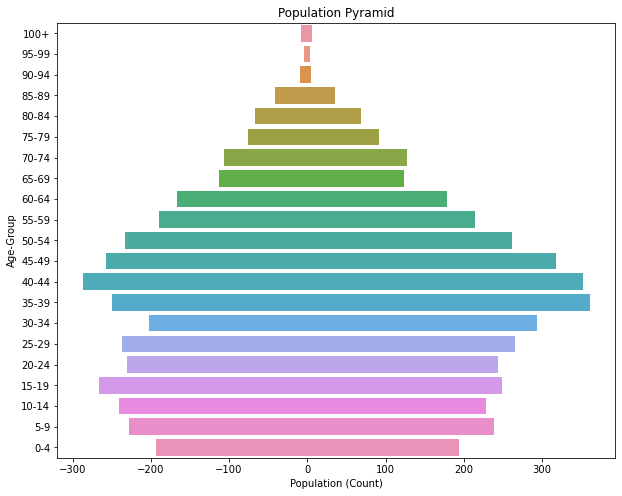

In [34]:
# Let's fisrt plot our Population Pyramid to help us examine the age distribution for both male and female.

gender_group = pd.crosstab(census_df['Age Group'], census_df['Gender'])
male = -1 * gender_group['Male']
female = gender_group['Female']
age_group = gender_group.index

sorted_range = ['100+', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74', '65-69', '60-64',
       '55-59', '50-54', '45-49', '40-44', '35-39', '30-34', '25-29',
       '20-24', '15-19', '10-14', '5-9', '0-4']

plt.figure(figsize=(10, 8))
bar_plot = sns.barplot(x=male, y=gender_group.index, data=gender_group, order= sorted_range)

bar_plot = sns.barplot(x=female, y=age_group, data=gender_group, order= sorted_range)

bar_plot.set(xlabel="Population (Count)", ylabel="Age-Group", title = "Population Pyramid")

plt.show()


<Figure size 864x576 with 0 Axes>

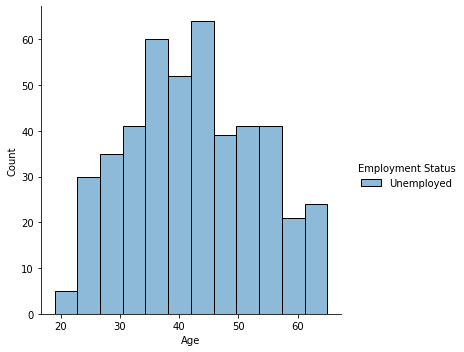

In [35]:
# Let's plot a displot to view the ages for the unemployed.

plt.figure(figsize=(12, 8))

unemployed = census_df[census_df['Employment Status'] == 'Unemployed'] 
employed = census_df[census_df['Employment Status'] == 'Employed']
sns.displot(data = unemployed, x = census_df['Age'], hue ='Employment Status')


plt.show()


<AxesSubplot:xlabel='Age', ylabel='Density'>

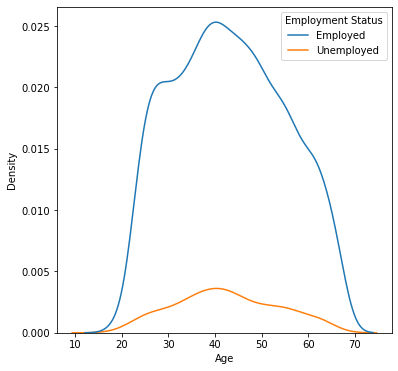

In [36]:
# Let's compare the ages for both employed and unemployed.

plt.figure(figsize=(6, 6))
employed_not = census_df[(census_df['Employment Status'] == 'Unemployed') | (census_df['Employment Status'] == 'Employed')]
sns.kdeplot(data = employed_not, x = census_df['Age'], hue ='Employment Status')

Text(0.5, 1.0, 'Divorced Gender Category')

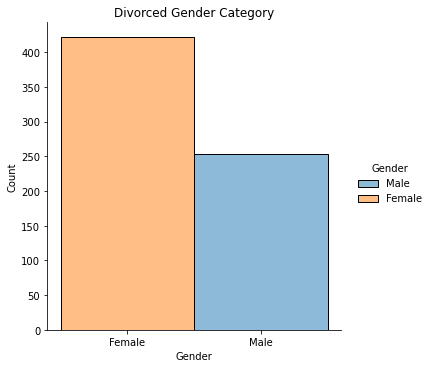

In [37]:
# Let's look at the divorced gender category 

sns.displot(data = census_df[census_df['Marital Status'] == 'Divorced'], x =census_df['Gender'] , hue = 'Gender')

plt.title('Divorced Gender Category')

<AxesSubplot:xlabel='Age', ylabel='Religion'>

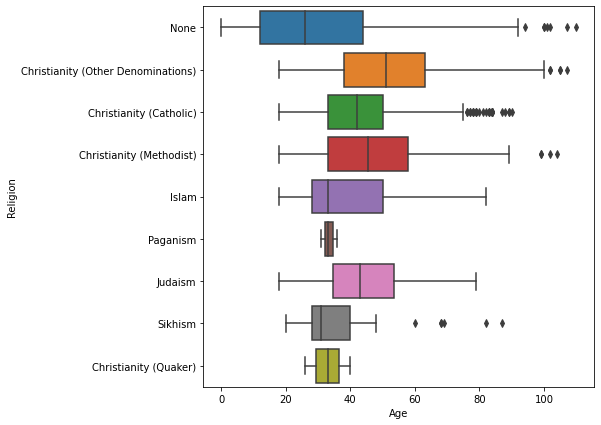

In [38]:
# Let's look at the boxplot of religion by age.

plt.figure(figsize=(7, 7))
#no_none_rdf = census_df[census_df['Religion'] != 'None'] 
sns.boxplot(data = census_df, x = 'Age', y ='Religion')


<AxesSubplot:xlabel='Age', ylabel='Marital Status'>

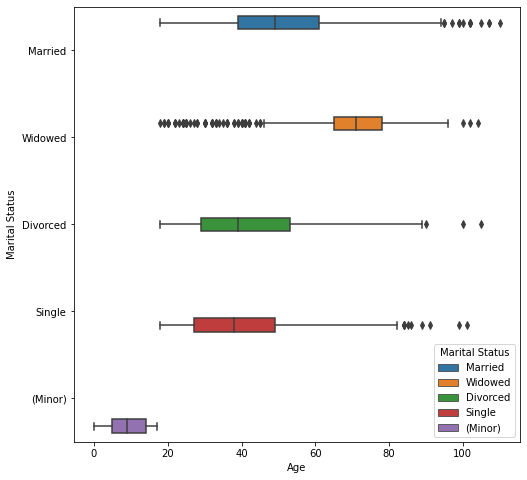

In [39]:
# Boxplot of marital status against age.

plt.figure(figsize=(8, 8))
sns.boxplot(data = census_df, y = 'Marital Status', x ='Age', hue = 'Marital Status')

<AxesSubplot:xlabel='Number of Occupants'>

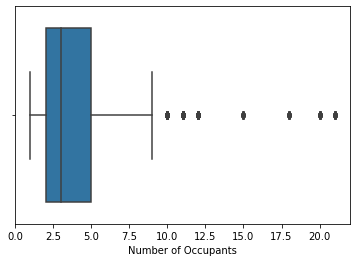

In [40]:
# Boxplot of number of occupants

sns.boxplot(data = census_df, x = 'Number of Occupants')

In [41]:
# Statistics of the number of occupants.

census_df['Number of Occupants'].describe()

count    7260.000000
mean        3.687052
std         2.506830
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        21.000000
Name: Number of Occupants, dtype: float64

<AxesSubplot:xlabel='Employment Status', ylabel='Count'>

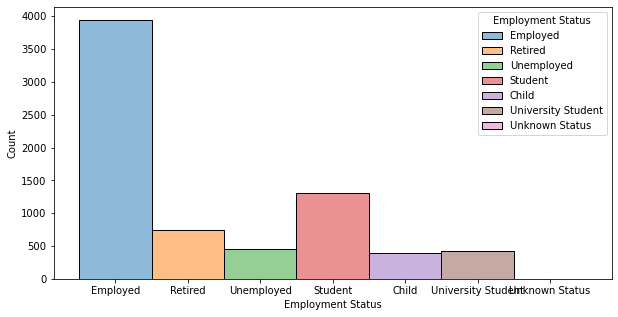

In [42]:
# Histogram plot of employment status.

plt.figure(figsize=(10, 5))
sns.histplot(data = census_df, x = 'Employment Status', hue = 'Employment Status')

### Birth Death Rate Function 
A function called ‘birth death rate’ was created to give us a clear analysis of the birth and death rate of our census data.

This function takes in a single argument which is the number of years we want to analyse and it returns a line plot 

representation of both the birth and death rate.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


,Birth,Death,Difference
Year,,,
Year 5,86,19,67
Year 4,92,27,65
Year 3,78,25,53
Year 2,81,27,54
Year 1,50,29,21


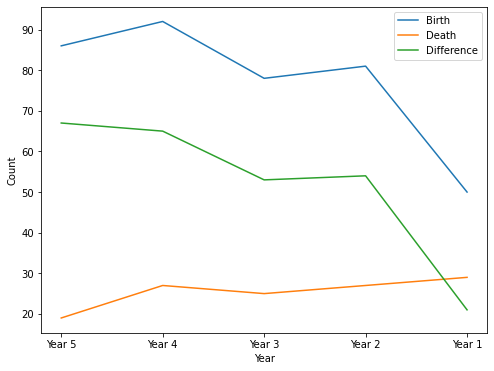

In [43]:
# Function to plot both birth and death rate.

def birth_death_rate(n):
    year = []
    birth = []
    death = []
    pop_diff = []
    for i in range(n):
        if i in census_df.Age:
            year.append(f"Year {i+1}")
            birth.append(sum(census_df['Age']==i))
            death.append(sum(census_df['Age']== 81+i)) # Death-Rate is over 80 years
            pop_diff.append(birth[i]- death[i])
            
    pop_dict = dict(Year = year[::-1], Birth = birth[::-1], Death = death[::-1], Difference = pop_diff[::-1]) 
    
    result = pd.DataFrame.from_dict(pop_dict).set_index('Year')
    
    plt.figure(figsize=(8, 6))
    
    plt.ylabel ('Count')
    
    for i in range(len(pop_dict)-1):
      
        print(sns.lineplot(result,y = result.columns[i], x = result.index,label = result.columns[i]))
        
    return result

birth_death_rate(5)        

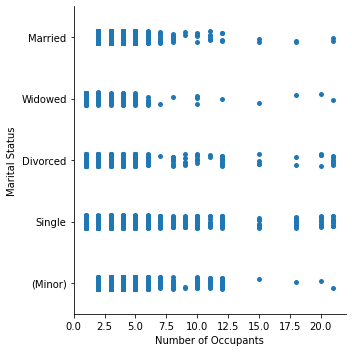

In [44]:
# Using a cat plot to show the relationship between the number of occupants in a household and marital status.

# Looking at the marital status, we can see a similarity between married and minor. 

# This tells us that minors are mostly in married homes

sns.catplot(data=census_df, x='Number of Occupants', y='Marital Status')

### Sweetviz Visualization and Analysis
We can use sweetviz to gain more insight for a better analysis.

In [45]:
# Using sweetviz to gain more insight for a better analysis.

census_10_report = sv.analyze(census_df)
census_10_report.show_html('census_10.html', open_browser=False)

IFrame('census_10.html', height = 1000, width = 1000)
#IPython.display.HTML('census_10.html')

                                             |                                             | [  0%]   00:00 ->…

Report census_10.html was generated.
